      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


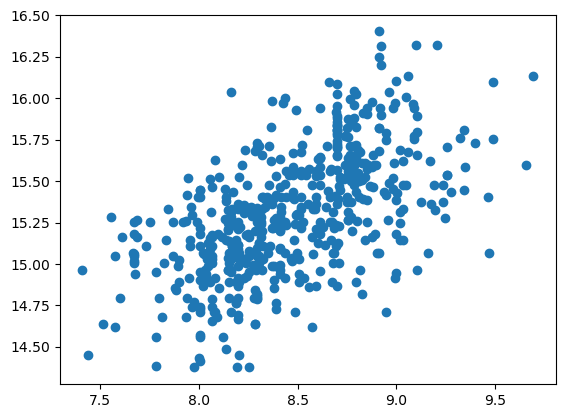

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('Housing.csv')
print(df.head())

xpoints = np.log(df.area)
ypoints = np.log(df.price)

plt.plot(xpoints, ypoints, 'o')
plt.show()

In [102]:
xpoints_array = np.array([xpoints])
##xpoints_crochet = [xpoints]
ww = np.array([[ 1, 2, 3]])
ww.shape
##xpoints_crochet.shape
##  print(np.transpose(xpoints_array))

(1, 3)

In [104]:
tableau = [  1 , 1 , 3  ,  1 , 2 ,4  ] 
tableau

[1, 1, 3, 1, 2, 4]

In [106]:
tableau_array = np.array(tableau)
print(tableau_array.T)
tableau_array.shape

[1 1 3 1 2 4]


(6,)

In [108]:
cr = np.dot(tableau_array,tableau_array)
cr

32

In [110]:
xpoints_array = np.array([xpoints])
xpoints_array.shape
xpoints_array_col = xpoints_array.T
N = xpoints_array_col.size

In [112]:
unn = np.ones((N, 1))
unn.shape

(545, 1)

In [114]:
X_data = np.concatenate((unn, xpoints_array_col ), axis=1)

In [116]:
theta = np.array([[2 , 3]])
theta.shape

(1, 2)

In [118]:
y_pred = np.dot(X_data,theta.T)

In [120]:
y_pred

array([[28.73580301],
       [29.30157652],
       [29.61899705],
       [28.7679749 ],
       [28.73580301],
       [28.7679749 ],
       [29.17156758],
       [31.07829956],
       [28.99885802],
       [27.9708654 ],
       [30.46391633],
       [28.09854424],
       [28.36166099],
       [26.48155474],
       [28.88563704],
       [28.09854424],
       [28.38447478],
       [29.14346433],
       [27.30143475],
       [28.30152019],
       [27.11303204],
       [28.62670008],
       [28.98028211],
       [27.27523371],
       [29.247521  ],
       [28.35707733],
       [28.09854424],
       [29.27298084],
       [28.94278162],
       [27.83751011],
       [28.75795819],
       [28.56099628],
       [27.4787015 ],
       [28.07847728],
       [28.49162903],
       [28.56099628],
       [28.76076624],
       [29.31493957],
       [28.09854424],
       [28.09854424],
       [28.36166099],
       [28.27335097],
       [28.32942737],
       [28.09854424],
       [28.09854424],
       [28

In [122]:
ypoints_array = np.array([ypoints]).T
ypoints_array.shape

(545, 1)

In [124]:
d_theta = (1/N) * np.dot(X_data.T , y_pred - ypoints_array)
d_theta

array([[ 12.0926255 ],
       [102.77185598]])

In [126]:
cost = np.dot( (y_pred - ypoints_array).T ,(y_pred - ypoints_array) )
cost

array([[80267.56286084]])

In [214]:
nloop = 2000
alpha = 1e-4
#theta = np.array([[0.2e7 , 1000]]).T
theta = np.array([[10 , 0.1]]).T
theta0 = theta.copy()
cost2 = np.ones((1 , nloop+1))
for i in range(nloop):
    y_pred = np.dot(X_data,theta)
    d_theta = (1/N) * np.dot(X_data.T , y_pred - ypoints_array)
    theta = theta - alpha*d_theta
    cost2[0,i] = (1/2/N) * np.dot( (y_pred - ypoints_array).T ,(y_pred - ypoints_array) )

    

C:\Users\omesdjian\AppData\Local\Temp\ipykernel_16116\497105060.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost2[0,i] = (1/2/N) * np.dot( (y_pred - ypoints_array).T ,(y_pred - ypoints_array) )


In [216]:
##cost2 = np.ones((1 , nloop+2))
cost2[0,2]

9.721522406031099

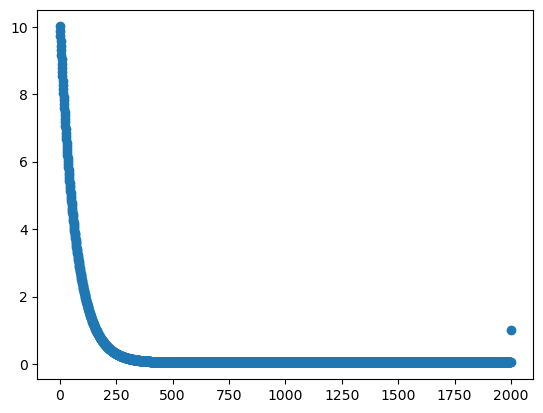

In [218]:
plt.plot(cost2[0,0:], 'o')
plt.show()

In [220]:
theta

array([[10.06150175],
       [ 0.61938621]])

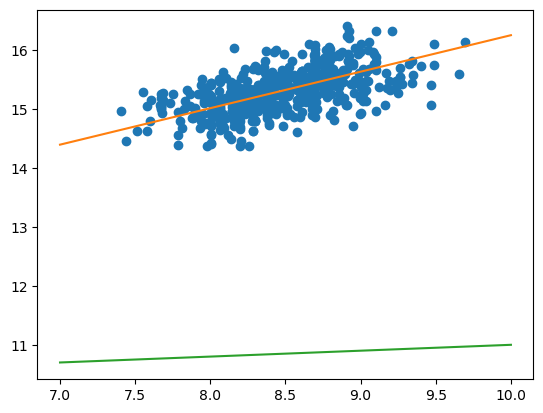

In [222]:
xfit = np.linspace(7, 10, num=5)
yfit = theta[0,0]+theta[1,0]*xfit
yfit0 = theta0[0,0]+theta0[1,0]*xfit


plt.plot(xpoints, ypoints, 'o')
plt.plot(xfit , yfit)
plt.plot(xfit , yfit0)
plt.show()


In [192]:
d_theta

array([[-0.10198478],
       [-0.92683838]])

In [42]:
(1/2/N) * np.dot( (y_pred - ypoints_array).T ,(y_pred - ypoints_array) )

array([[5.60622137e+12]])